# 2.3 Activity

For our **Unit 2** activities, we will continue working with snowpack, precipitation, and temperature measurements from 2014 to 2019 at the Central Sierra Snow Laboratory in Sierra Nevada, California.

In this lesson, our focus will be on learning how to graphically represent our data.

By the end of this activity, you will:

1. Use Seaborn to create plots for your data
3. Reflect on what the plots created tell you about the data

**Acknowledgements**

Osterhuber, Randall; Schwartz, Andrew (2021), Snowpack, precipitation, and temperature measurements at the Central Sierra Snow Laboratory for water years 1971 to 2019, Dryad, Dataset, https://doi.org/10.6078/D1941T

## Task 1: Setup Workspace

Import Pandas and Seaborn, then read in the data file **exported at the end of Activity 2.1** to a variable called `precip` and drop any 'Unnamed' columns. You can use `pd.read_csv('filename.csv', index_col=0)` to treat the first column as the row index eliminating the need to drop it.

Seaborn is typically imported as `sns`.

See [Seaborn Quickstart](https://seaborn.pydata.org/installing.html#quickstart) for help.

Return the first few rows of data to ensure it has loaded correctly.

*Note: If you did not save the file your Google Drive, upload it to this workspace using the **Files** folder on the left.*

In [6]:
#import and mount google drive
from google.colab import drive
drive.mount('/gdrive')
#import libraries
import pandas as pd
import seaborn as sns
#read in our data set from 2.1
precip = pd.read_csv('/gdrive/MyDrive/revised_precip.csv', index_col=0)
precip.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,Date,Air Temp Max (C),Air Temp Min (C),24-hour Total Precip (mm),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,New Snow (cm),Season Total Snow (cm),Snowpack depth (cm),Snow Water Equivalent (cm),Air Temp Max (F),Air Temp Min (F)
0,10/1/14,16,3,0,0,NaN,NaN,0,0.0,0,0,60.8,37.4
1,10/2/14,22,1,0,0,NaN,NaN,0,0.0,0,0,71.6,33.8
2,10/3/14,24,5,0,0,NaN,NaN,0,0.0,0,0,75.2,41.0
3,10/4/14,26,5,0,0,NaN,NaN,0,0.0,0,0,78.8,41.0
4,10/5/14,25,8,0,0,NaN,NaN,0,0.0,0,0,77.0,46.4


## Task 2: Create Visualizations

In this section we'll use Seaborn to create a:

- Histogram
- Line Plot
- Correlation Matrix
- Plot of your choice

### Histograms

> *A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.*

[Reference](https://seaborn.pydata.org/generated/seaborn.histplot.html)

Recreate the histogram from **Activity 2.1** with Pandas using:

`precip['Air Temp Max (C)'].hist()`

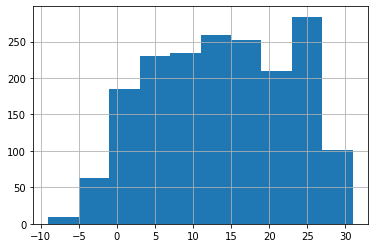

In [7]:
precip['Air Temp Max (C)'].hist()

Next, let's create the same histogram of the same data using `sns.histplot()` instead.

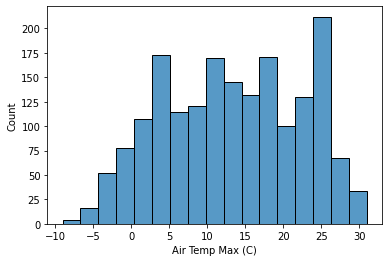

In [10]:
sns.histplot(x='Air Temp Max (C)', data=precip) #this version has the nice addition of pre-prepared axis labels
#I also find it more helpful that this has the value "bins" clearly defined and in slightly smaller width so you get a little more granularity to the spread

**Notice a difference?**

### Line Plots

> *By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.*

[Reference](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Create a time series `lineplot` of `Air Temp Max (C)`.

*Hint: First, you'll need to convert the `Date` column to the `datetime64` dtype with `df['column'] = pd.to_datetime(df['column'])`.*

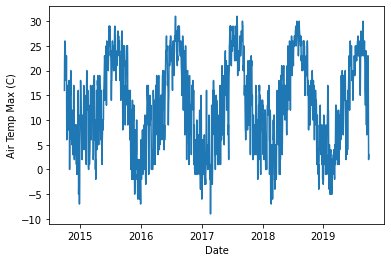

In [14]:
#converting the Date data type to datetime64
precip['Date'] = pd.to_datetime(precip['Date'])
#time series line plot
sns.lineplot(x='Date', y='Air Temp Max (C)', data = precip)
#the below plot is cool because you can see the cyclical nature of temperature throughout the year

We're making progress but this is a little hard to read.

Try recreating the plot but, this time overlay each month by specifying `x = precip['Date'].dt.month` when creating your line plot.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


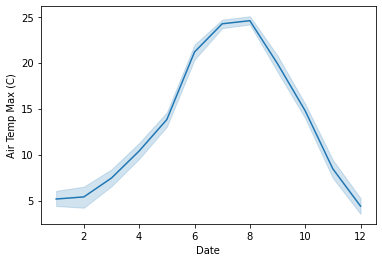

In [16]:
sns.lineplot(precip['Date'].dt.month, y='Air Temp Max (C)', data = precip)
#In the below, we can see all the data laid over each other for each month. It seems like spring/ summer time (5-8) has the tightest band, where there's a little more variation in winter (1-4, 11-12)

### Heatmaps

> *Plot[s] rectangular data as a color-encoded matrix.*

[Reference](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

We'll learn more about statistical methods in **Unit 3**. For now, let's create a correlation matrix using `heatmap` and `data = precip.corr()`.

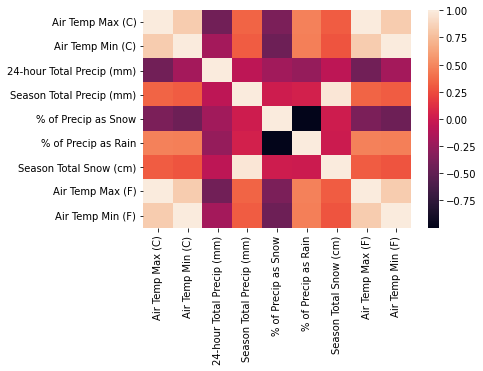

In [17]:
sns.heatmap(data = precip.corr())

### Build Your Own

Using what you've learned so far and [Seaborn's documentation](https://seaborn.pydata.org/tutorial/function_overview.html) as a reference, create your own visualization with one of the basic plotting functions not yet covered. We'll go more into detail on customizing visualizations in **Unit 4**.

*Hint: Try making a **scatterplot**, **boxplot**, or even a **pairplot**. Be cautious when selecting a large number of variables in a pairplot.*

Text(0.5, 0.98, 'Season Total Precip by Season Total Snow')

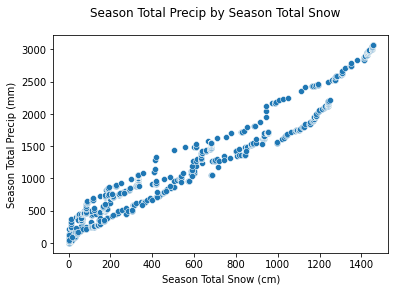

In [67]:
#scatterplot
a = sns.scatterplot(data = precip, y = 'Season Total Precip (mm)', x ='Season Total Snow (cm)')
a.figure.suptitle('Season Total Precip by Season Total Snow')
#we can see the relationship that with more season snow comes more season rain (precip)

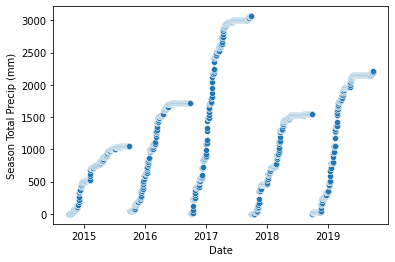

In [66]:
#another scatterplot
sns.scatterplot(data = precip, y = 'Season Total Precip (mm)', x ='Date')
#kind of a funky plot below but you can see that it rained a lot more in 2017 than it did in the adjacent years

Text(0.5, 0.98, 'Boxplot of Air Temp Min (C)')

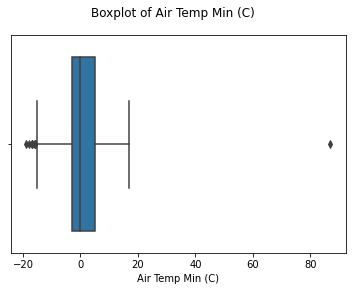

In [60]:
#boxplot
b = sns.boxplot(data = precip, x ='Air Temp Min (C)')
b.figure.suptitle('Boxplot of Air Temp Min (C)')
#this one isn't doing a whole lot but we can see there is a massive outlier that was likely a typo. 85 degrees celcius is like 185 degrees ferenheit

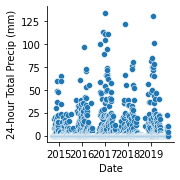

In [65]:
#pairplot
c = sns.pairplot(data = precip, x_vars='Date', y_vars='24-hour Total Precip (mm)')

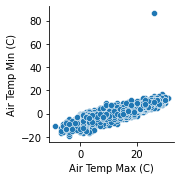

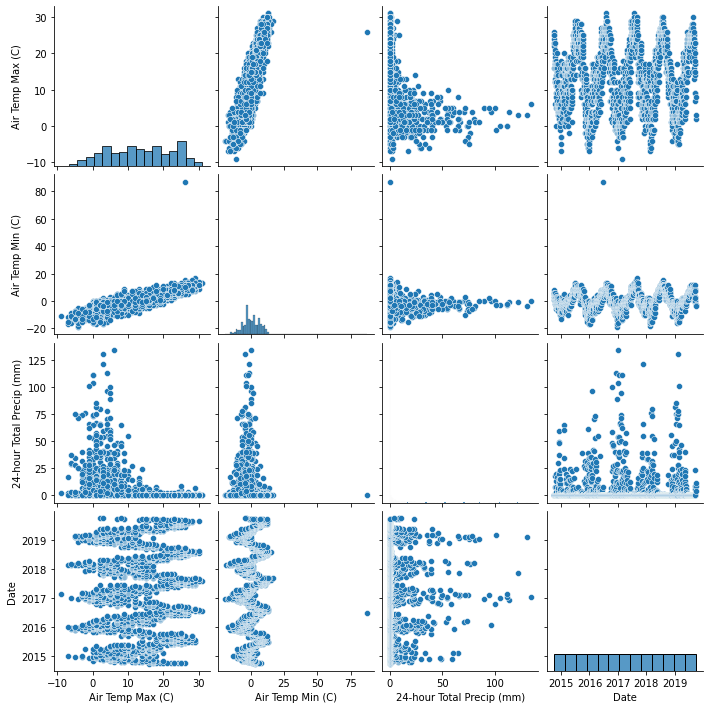

In [64]:
#more pairplots
sns.pairplot(data = precip, x_vars ='Air Temp Max (C)', y_vars='Air Temp Min (C)')
sns.pairplot(data = precip, vars=["Air Temp Max (C)", "Air Temp Min (C)", "24-hour Total Precip (mm)", "Date"])
#this last plot has a matrix including the other two pairplots we already made. It's cool to see these different scatterplots in one place

## Task 3: Thought Question

>*What are the benefits of creating data visualizations compared to just having numerical summaries?*

Data visualizations are, in my opinion, the backbone of understanding a data set. While numerical summaries are integral to identifying key statistics, being able to see the distribution of a variable or its relationship to others is hugely effective in leaving you with a memorable understanding of the data. For example, the time series line plot of temperature we did above. We all know through anecdotal experience (and basic common sense) that temperature changes throughout the year and, in North America) it is warm in the summar and cold in the winter. But seeing both the full line plot and the overlaid month line plot really illustrates the point more concretely. Additionally, I feel that in general, data visualizations have the huge benefit that you don't necessarily need to know the data set in depth in order to see what's going on. If you're showing an outsider a plot that shows trend over time, it shouldn't take a significant amount of background for them to get the gist of what's going on (which I sometimes feel is the case with more "abstract" statistical descriptors).